In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib import rc, rcParams
rc('text', usetex=True)
rc('axes', linewidth=1.5)
rc('axes', labelweight='bold')
rc('axes',labelsize=16)
rc('axes.formatter',min_exponent=0)
rc('font', weight='bold')
rc('font', size=14)
rc('xtick',direction='in')
rc('ytick',direction='in')
rc('xtick.major',width=1)
rc('ytick.major',width=1)
rc('xtick.major',size=6)
rc('ytick.major',size=6)
rc('xtick.minor',visible=True)
rc('ytick.minor',visible=True)
rc('xtick.minor',size=3)
rc('ytick.minor',size=3)
rc('xaxis',labellocation='right')
rc('yaxis',labellocation='top')
rc('lines',linewidth='2')
rcParams['text.latex.preamble'] = r'\usepackage{sfmath} \boldmath'

In [2]:
#newep.h in duke machine
M=938.272046e-3 #GeV
M2=M*M
mu=2.792782
tofm=25.68189504
def GEp_newep(Q2):
    a11 = 2.90966
    a12 = -1.11542229
    a13 = 3.866171e-2
    b11 = 14.5187212
    b12 = 40.88333
    b13 = 99.999998
    b14 = 4.579e-5
    b15 = 10.3580447
    t = Q2/(4*M2)
    return (1+a11*t+a12*t**2+a13**t**3)/(1+b11*t+b12*t**2+b13*t**3+b14*t**4+b15*t**5)

def GMp_newep(Q2):
    
    a21 = -1.43573
    a22 = 1.19052066
    a23 = 2.5455841e-1
    b21 = 9.70703681
    b22 = 3.7357e-4
    b23 = 6.0e-8
    b24 = 9.9527277
    b25 = 12.7977739
    t = Q2/(4*M2)
    return mu*(1+a21*t+a22*t**2+a23*t**3)/(1+b21*t+b22*t**2+b23*t**3+b24*t**4+b25*t**5)

    

In [3]:
#in ruonan's thesis
def GMp_rn(Q2):
    return 2.79*(1+Q2/0.71)**-2
def GEp_rn(Q2):
    return (1+Q2/0.71)**-2

In [4]:
#Kelly 
def GMp_kelly(Q2):
    a11=-0.24
    b11=10.98
    b12=12.82
    b13=21.97
    a21=0.12
    b21=10.97
    b22=18.86
    b23=6.85
    t=Q2/(4*M2)
    return mu*(1.0+a21*t)/(1.0+b21*t+b22*t**2+b23*t**3)
def GEp_kelly(Q2):
    Q2fm=Q2*tofm
    A=1.0/(tofm*4*M2)
    p0=-0.24*A
    p1=10.98*A
    p2=12.82*A**2
    p3=21.97*A**3
    return (1.0+p0*Q2fm)/(1.0+p1*Q2fm+p2*Q2fm**2+p3*Q2fm**3)
    

In [5]:
#Arrington2004
def GMp_Arrington2004(Q2):
    p2=3.19
    p4=1.355
    p6=0.151
    p8=-1.14e-2
    p10=5.33e-4
    p12=-9e-6
    return mu*(1.0/(1.0+p2*Q2+p4*Q2**2+p6*Q2**3+p8*Q2**4+p10*Q2**5+p12*Q2**6))
def GEp_Arrington2004(Q2):
    Q2fm=Q2*tofm
    A=1.0/tofm
    p0=3.226*A
    p1=1.508*A**2
    p2=-0.3773*A**3
    p3=0.611*A**4
    p4=-0.1853*A**5
    p5=1.596e-2*A**6
    return 1.0/(1.0+p0*Q2fm+p1*Q2fm**2+p2*Q2fm**3+p3*Q2fm**4+p4*Q2fm**5+p5*Q2fm**6)
#Arrington2007
def GMp_Arrington2007(Q2):
    b1=3.173
    b2=-0.314
    b3=-1.165
    b4=5.619
    b5=-1.087
    f5=1.0+b5*Q2
    f4=1.0+b4*Q2/f5
    f3=1.0+b3*Q2/f4
    f2=1.0+b2*Q2/f3
    f1=1.0+b1*Q2/f2
    return mu/f1
#Arrington2011Venkat2011
def GEp_Arrington2011(Q2):
    Q2fm=Q2*tofm
    A=1.0/(tofm*4*M2)
    p0=2.90966*A
    p1=-1.11542229*A**2
    p2=3.866171e-2*A**3
    p3=14.57212*A
    p4=40.88333*A**2
    p5=99.999998*A**3
    p6=4.579e-5*A**4
    p7=10.3580447*A**5
    return(1.0+p0*Q2fm+p1*Q2fm**2+p2*Q2fm**3)/(1.0+p3*Q2fm+p4*Q2fm**2+p5*Q2fm**3+p6*Q2fm**4+p7*Q2fm**4)
def GMp_ArringtonSick(Q2):
    f5 = 1. + -0.284*Q2
    f4 = 1. +  1.176*Q2/f5
    f3 = 1. + -1.212*Q2/f4
    f2 = 1. + -0.178*Q2/f3;
    f1 = 1. +  3.440*Q2/f2;
  
    return 1./f1;


In [6]:
#BernauerThesis https://www.osti.gov/etdeweb/servlets/purl/21403504
def GM_BernauerThesis(qq):
    GM = 1. + -2.5952*qq + 1.0222*qq**2 + 23.4945*qq**3+ -93.0372*qq**4 + 140.7984*qq**5 + -0.3656*qq**6+ -305.6759*qq**7 + 444.6251*qq**8 + -273.6688*qq**9+ 64.5811*qq**10
    return mu*GM
def GM_BernauerUnBound2(qq):
    GM = 1. + -2.46540*qq + -0.72681*qq**2 + 35.31550*qq**3+ -136.38607*qq**4 + 228.82482*qq**5 + -98.11370*qq**6+  -234.09993*qq**7 + 349.90224*qq**8 + -122.36794*qq**9+ -56.48797*qq**10 + 35.79737*qq**11
    return mu*GM
def GM_BernauerBound2(qq):
    GM = 1. + -2.76018*qq + 4.97927*qq**2 + -5.19625*qq**3+ 2.19337*qq**4 + -0.00000*qq**5 + 0.50348*qq**6+ -0.53301*qq**7 + 0.00000*qq**8 + -0.00001*qq**9+ 0.00001*qq**10 +  -0.00000*qq**11
    return mu*GM
def GM_BernauerUnBound1(qq):
    GM = 1. + -2.52353*qq + -0.70801*qq**2 + 40.15560*qq**3+ -176.65515*qq**4 + 380.27777*qq**5 + -392.56122*qq**6+ 11.52512*qq**7 + 442.38507*qq**8 +  -492.08183*qq**9+ 230.28595*qq**10 + -40.91969*qq**11
    return mu*GM
def GM_BernauerBound1(qq):
    GM = 1. + -2.79955*qq + 5.18800*qq**2 + -5.74202*qq**3+ 2.80554*qq**4 + -0.00001*qq**5 + 0.01034*qq**6 +  -0.27663*qq**7 + 0.00000*qq**8 + -0.00092*qq**9 + 0.00127*qq**10 + -0.00003*qq**11
    return mu*GM
def GE_Bernauer2014(Q2):
    tz=Q2
    GE =1. - 3.36591660*tz + 1.45487683e+01*tz**2 - 8.87959239e+01*(tz**3) + 4.61097705e+02*(tz**4) - 1.67562381e+03*(tz**5) + 4.07646487e+03*(tz**6) - 6.45411460e+03*(tz**7) + 6.34035079e+03*(tz**8) - 3.49373923e+03*(tz**9) + 8.22601568e+02*(tz**10);  #0.8868 fm
    return GE
def GE_BernauerThesis(Q2):
    tz=Q2
    GE =1. - 3.3686*tz + 14.5606*tz**2 - 88.1912*(tz**3) + 453.6244*(tz**4) - 1638.7911*(tz**5) + 3980.7174*(tz**6) - 6312.6333*(tz**7) + 6222.3646*(tz**8) - 3443.2251*(tz**9) + 814.4112*(tz**10);  #0.8872 fm
    return GE


In [7]:
Q2=np.arange(1,10,0.1)
GEp_neweps = GEp_newep(Q2)
print(GEp_neweps)
GMp_neweps = GMp_newep(Q2)
print(GMp_neweps)

[2.48346624e-01 2.14676751e-01 1.86477430e-01 1.62684695e-01
 1.42480614e-01 1.25227889e-01 1.10423938e-01 9.76679936e-02
 8.66371363e-02 7.70685741e-02 6.87463998e-02 6.14915922e-02
 5.51544104e-02 4.96085721e-02 4.47467751e-02 4.04772366e-02
 3.67210085e-02 3.34098827e-02 3.04847471e-02 2.78942800e-02
 2.55939018e-02 2.35449153e-02 2.17137873e-02 2.00715336e-02
 1.85931798e-02 1.72572804e-02 1.60454834e-02 1.49421332e-02
 1.39339083e-02 1.30094911e-02 1.21592711e-02 1.13750801e-02
 1.06499587e-02 9.97795456e-03 9.35395058e-03 8.77351976e-03
 8.23280541e-03 7.72842303e-03 7.25738090e-03 6.81701621e-03
 6.40494414e-03 6.01901701e-03 5.65729157e-03 5.31800264e-03
 4.99954144e-03 4.70043776e-03 4.41934494e-03 4.15502710e-03
 3.90634813e-03 3.67226206e-03 3.45180462e-03 3.24408575e-03
 3.04828293e-03 2.86363519e-03 2.68943781e-03 2.52503741e-03
 2.36982770e-03 2.22324549e-03 2.08476718e-03 1.95390551e-03
 1.83020668e-03 1.71324769e-03 1.60263390e-03 1.49799689e-03
 1.39899242e-03 1.305298

In [8]:
GEp_rns = GEp_rn(Q2)
print(GEp_rns)
GMp_rns = GMp_rn(Q2)
print(GMp_rns)

[0.17239492 0.15387198 0.13818152 0.12477414 0.11322747 0.10321246
 0.09446974 0.08679258 0.0800146  0.07400068 0.06864013 0.06384164
 0.05952929 0.05563956 0.05211898 0.04892227 0.0460109  0.04335188
 0.04091688 0.03868141 0.03662426 0.03472696 0.03297336 0.03134931
 0.02984235 0.0284415  0.02713702 0.02592027 0.02478356 0.02372001
 0.02272348 0.02178846 0.02090998 0.02008359 0.01930523 0.01857125
 0.01787836 0.01722353 0.01660403 0.01601736 0.01546125 0.0149336
 0.01443251 0.01395622 0.01350312 0.01307174 0.01266071 0.01226876
 0.01189473 0.01153755 0.01119623 0.01086982 0.01055749 0.01025842
 0.00997189 0.0096972  0.0094337  0.00918079 0.00893793 0.00870457
 0.00848024 0.00826446 0.00805682 0.00785691 0.00766434 0.00747877
 0.00729986 0.00712729 0.00696077 0.00680002 0.00664478 0.00649479
 0.00634982 0.00620965 0.00607407 0.00594289 0.00581591 0.00569295
 0.00557385 0.00545846 0.00534661 0.00523816 0.00513298 0.00503093
 0.0049319  0.00483577 0.00474241 0.00465174 0.00456364 0.00447

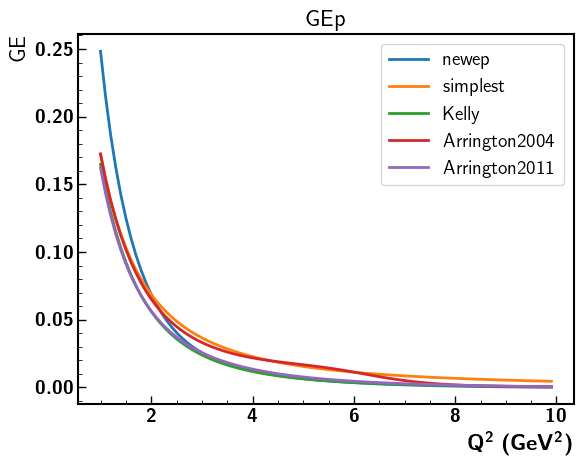

In [9]:
plt.plot(Q2,GEp_neweps,label='newep')

plt.plot(Q2,GEp_rns,label='simplest')
plt.plot(Q2,GEp_kelly(Q2),label='Kelly')
plt.plot(Q2,GEp_Arrington2004(Q2),label='Arrington2004')
plt.plot(Q2,GEp_Arrington2011(Q2),label='Arrington2011')
#plt.plot(Q2,GE_Bernauer2014(Q2),label='Bernauer2014')
#plt.plot(Q2,GE_BernauerThesis(Q2),label='Bernauerthesis')
plt.title('GEp')
plt.xlabel(r'$Q^2$ $(GeV^2)$')
plt.ylabel('GE')
plt.legend()
plt.savefig('../Proposals/Unpol_proposal/elastic_ep/GE.pdf')

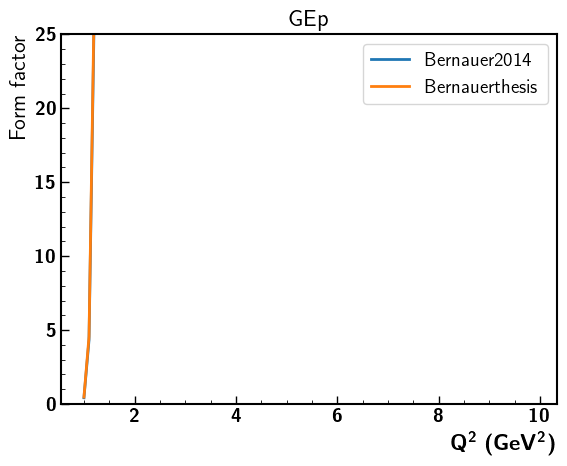

In [10]:
#plt.plot(Q2,GEp_neweps,label='newep')

#plt.plot(Q2,GEp_rns,label='simplest')
#plt.plot(Q2,GEp_kelly(Q2),label='Kelly')
#plt.plot(Q2,GEp_Arrington2004(Q2),label='Arrington2004')
#plt.plot(Q2,GEp_Arrington2011(Q2),label='Arrington2011')
plt.plot(Q2,GE_Bernauer2014(Q2),label='Bernauer2014')
plt.plot(Q2,GE_BernauerThesis(Q2),label='Bernauerthesis')
plt.title('GEp')
plt.xlabel(r'$Q^2$ $(GeV^2)$')
plt.ylabel('Form factor')
plt.ylim(0,25)
plt.legend()

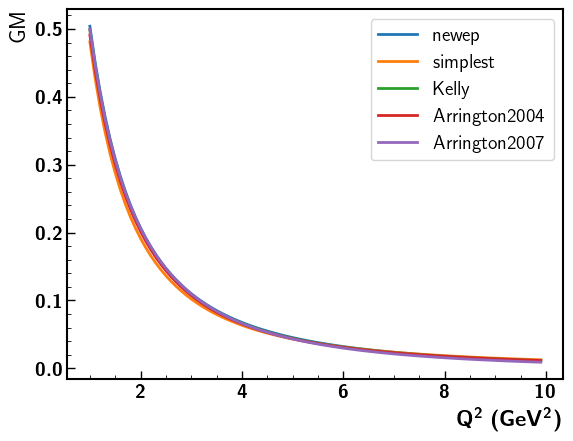

In [11]:
plt.plot(Q2,GMp_neweps,label='newep')
plt.plot(Q2,GMp_rns,label='simplest')
plt.plot(Q2,GMp_kelly(Q2),label='Kelly')
plt.plot(Q2,GMp_Arrington2004(Q2),label='Arrington2004')
plt.plot(Q2,GMp_Arrington2007(Q2),label='Arrington2007')

#plt.plot(Q2,GMp_ArringtonSick(Q2),label='ArringtonSick')
#plt.plot(Q2,GM_BernauerThesis(Q2),label='BernauerThesis')
#plt.plot(Q2,GM_BernauerUnBound2(Q2),label='BernauerUnB2')
#plt.plot(Q2,GM_BernauerBound2(Q2),label='BernauerB2')
#plt.plot(Q2,GM_BernauerUnBound1(Q2),label='BernauerUnB1')
#plt.plot(Q2,GM_BernauerBound1(Q2),label='BernauerB1')

plt.xlabel(r'$Q^2$ $(GeV^2)$')
plt.ylabel('GM')
plt.legend()
plt.savefig('../Proposals/Unpol_proposal/elastic_ep/GM.pdf')

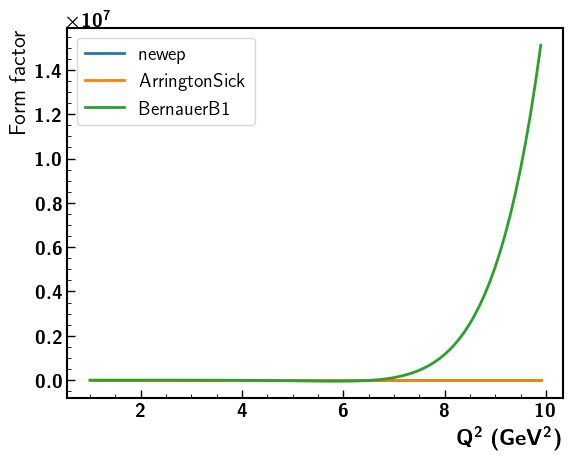

In [12]:
plt.plot(Q2,GMp_neweps,label='newep')
#plt.plot(Q2,GMp_rns,label='simplest')
#plt.plot(Q2,GMp_kelly(Q2),label='Kelly')
#plt.plot(Q2,GMp_Arrington2004(Q2),label='Arrington2004')
#plt.plot(Q2,GMp_Arrington2007(Q2),label='Arrington2011')

plt.plot(Q2,GMp_ArringtonSick(Q2),label='ArringtonSick')
#plt.plot(Q2,GM_BernauerThesis(Q2),label='BernauerThesis')
#plt.plot(Q2,GM_BernauerUnBound2(Q2),label='BernauerUnB2')
#plt.plot(Q2,GM_BernauerBound2(Q2),label='BernauerB2')
#plt.plot(Q2,GM_BernauerUnBound1(Q2),label='BernauerUnB1')
plt.plot(Q2,GM_BernauerBound1(Q2),label='BernauerB1')

plt.xlabel(r'$Q^2$ $(GeV^2)$')
plt.ylabel('Form factor')
plt.legend()